In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import statsmodels.api as sm
import seaborn as sns
sns.set()

In [9]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv',index_col=0)



In [10]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [11]:
df['_STATE'].unique()

array([ 9., 34., 36.])

Now check to see how large our subset df.

In [12]:
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [13]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [16]:
# to check if there are any colunms contain only missing values , if the number below == the number of row of the data 
# remove the colunms 
df.isnull().sum()

_STATE          0
FMONTH          0
IDATE           0
IMONTH          0
IDAY            0
            ...  
_RFSEAT2        0
_RFSEAT3        0
_FLSHOT6    22334
_PNEUMO2    22334
_AIDTST3     3773
Length: 358, dtype: int64

In [17]:
#remove all columns only contain missing value/naN
list_col=[]
for i in df.columns:
    
    if df[i].isnull().sum()==34545:
        list_col.append(i)


df_cleaned=df.drop(columns=list_col)
df_cleaned.shape      

(34545, 258)

In [18]:
# compare original data shape and cleaned data shape. we can see 100 colunms are removed.
df.shape

(34545, 358)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [154]:
# descriptive statistics
df_cleaned.describe()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
count,34545.000000,34545.000000,3.454500e+04,34545.000000,34545.000000,34545.000000,34545.000000,3.454500e+04,3.454500e+04,18502.0,...,34545.000000,34545.000000,34545.000000,34545.000000,34545.000000,34545.000000,34545.000000,12211.000000,12211.000000,30772.000000
mean,27.046693,6.966855,7.273633e+06,7.119323,15.229295,2017.001274,1118.428137,2.017006e+09,2.017006e+09,1.0,...,2.909654,2.651498,2.482038,3.553134,2.801216,1.850485,1.890606,2.380968,2.447875,1.844339
std,12.026461,3.479398,3.476456e+06,3.476148,8.821280,0.035667,38.771910,3.360677e+03,3.360677e+03,0.0,...,2.499531,2.528344,2.300046,2.457341,2.526893,2.409890,2.403713,2.617896,2.828682,1.347835
min,9.000000,1.000000,1.012018e+06,1.000000,1.000000,2017.000000,1100.000000,2.017000e+09,2.017000e+09,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.000000,4.000000,4.192017e+06,4.000000,7.000000,2017.000000,1100.000000,2.017003e+09,2.017003e+09,1.0,...,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,34.000000,7.000000,8.022017e+06,8.000000,15.000000,2017.000000,1100.000000,2.017006e+09,2.017006e+09,1.0,...,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,36.000000,10.000000,1.021202e+07,10.000000,22.000000,2017.000000,1100.000000,2.017009e+09,2.017009e+09,1.0,...,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,36.000000,12.000000,1.231202e+07,12.000000,31.000000,2018.000000,1200.000000,2.017012e+09,2.017012e+09,1.0,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [157]:
# graphic showing those descriptive stats

hist=df_cleaned['PHYSHLTH'].apply(lambda x: x if x in range(1,31) else 0)

hist

49938     0.0
49939     0.0
49940     2.0
49941     0.0
49942     0.0
         ... 
303774    0.0
303775    0.0
303776    6.0
303777    0.0
303778    0.0
Name: PHYSHLTH, Length: 34545, dtype: float64

In [158]:
hist.value_counts()

0.0     22094
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

Text(0, 0.5, 'Amount of people sick')

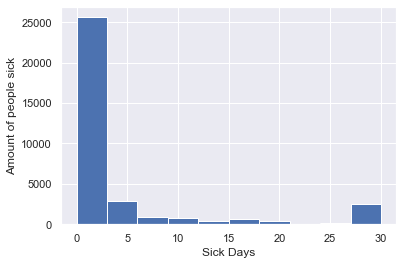

In [160]:
plt.hist(hist)
plt.xlabel('Sick Days')
plt.ylabel('Amount of people sick')

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [ ]:
#from the dictionary there are two different sick types  pysically sick or mentally sick.

In [21]:
# code to calculate the average number of sick days by state
# Groupby state and slect the column 'PHYSHLTH' which is  Number of Days Physical Health 
#  'MENTHLTH' =  number of the days that mental health are Not Good  and collect data for 2017 
num_sick_day_raw=df_cleaned[['_STATE','IMONTH','IYEAR','MENTHLTH','PHYSHLTH']].reset_index().drop(columns='index')
num_sick_day=num_sick_day_raw[num_sick_day_raw['IYEAR']==2017].reset_index().drop(columns='index')

In [22]:
# to set up dummy for physical sickness and mental sickness and if the values are 77,99 or blank will be None and 
# cannot be considered as meaningful data  
num_sick_day['PHYSHLTH']=num_sick_day['PHYSHLTH'].apply(lambda x: x if x in range(1,31)  else 0)
num_sick_day['MENTHLTH']=num_sick_day['MENTHLTH'].apply(lambda x: x if x in range(1,31)  else 0)
num_sick_day_cleaned=num_sick_day.dropna(axis=0)
num_sick_day_cleaned.shape

(34501, 5)

In [28]:
# to get the mean of mental and physical sickness each month groupby state
num_sick_day_clean=pd.DataFrame(num_sick_day_cleaned.groupby(['_STATE','IMONTH'])['MENTHLTH','PHYSHLTH'].mean()).reset_index()
num_sick_day_clean.head()

,_STATE,IMONTH,MENTHLTH,PHYSHLTH
0,9.0,1,3.267559,4.115942
1,9.0,2,3.234162,3.611868
2,9.0,3,3.052381,3.516190
3,9.0,4,3.069343,3.329684
4,9.0,5,3.379041,3.607581


In [24]:
# to get mean for year of 2017 
me=pd.DataFrame(num_sick_day_clean.groupby('_STATE')['MENTHLTH'].mean()).reset_index()
ph=pd.DataFrame(num_sick_day_clean.groupby('_STATE')['PHYSHLTH'].mean()).reset_index()

combo=pd.merge(me,ph,how="outer",on='_STATE')
combo

,_STATE,MENTHLTH,PHYSHLTH
0,9.0,3.067781,3.592353
1,34.0,3.551698,4.453109
2,36.0,3.593129,4.026003


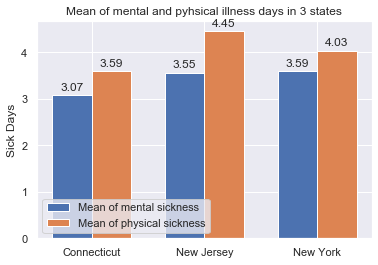

In [25]:
states_list = ['Connecticut','New Jersey','New York']

x = np.arange(len(states_list))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width/2, round(combo['MENTHLTH'],2), width, label='Mean of mental sickness')
rects2 = ax.bar(x + width/2, round(combo['PHYSHLTH'],2), width, label='Mean of physical sickness')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sick Days')
ax.set_title('Mean of mental and pyhsical illness days in 3 states')
ax.set_xticks(x)
ax.set_xticklabels(states_list)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.legend(loc='lower left')
plt.show()

# bar chart for the means of mental sickness and physical sickness in different states 
# those numbers mean people get sick around 3-4 days each month 


## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [29]:
#From the dictionary , I can see there are so many types of chronically sick people:
#Heart Attack/Angina or Coronary Heart Disease/Asthma/skin cancer/ 
#chronic obstructive pulmonary disease, emphysema or chronic bronchitis/depressive disorder/diabetes
# 'CVDINFR4/CVDCRHD4/ASTHMA3/CHCSCNCR/CHCCOPD1/ ADDEPEV2/DIABETE3'  we have 10 different types of chronic sickness
sickness_types=['Heart Attack','Angina \n Coronary Heart Disease','Stroke','Asthma','Skin Cancer',
               'Other Cancers','Emphysema \n Chronic Bronchitis','Depressive Disorder',
               'Diabetes','Kidney Disease']
sickness_type=['CVDINFR4','CVDCRHD4', 'CVDSTRK3','ASTHNOW','CHCSCNCR','CHCOCNCR','CHCCOPD1','ADDEPEV2','DIABETE3','CHCKIDNY']
d1=df_cleaned[['CVDINFR4','CVDCRHD4', 'CVDSTRK3','ASTHMA3','CHCSCNCR','CHCOCNCR','CHCCOPD1','ADDEPEV2','DIABETE3','CHCKIDNY']].reset_index().drop(columns='index')
# we can see each row has number  from (1 2 3 4 5 )if the value is 1 means the person has chronic disease
d1.head()

,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD1,ADDEPEV2,DIABETE3,CHCKIDNY
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0


In [30]:
# To get the the person who have chronically sickness, 
#if the cell value is not 1  return 0 ,if cell value is 1 return 1 
d2=[]
for i in d1.columns:
    d2.append(d1[i].apply(lambda x: 0 if x!=1 else 1 ))
#if we updated our data    
pd.DataFrame(d2).transpose()

,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD1,ADDEPEV2,DIABETE3,CHCKIDNY
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
34540,0,0,0,0,0,0,0,1,0,0
34541,0,0,0,0,0,0,0,0,0,0
34542,0,0,0,0,0,0,0,0,0,0
34543,0,0,0,0,0,0,0,0,0,0


In [31]:
#generate a table contains different chronical skines and the frequency for each columns from table above
ts=pd.DataFrame(pd.DataFrame(d2).transpose().mean(axis=0)).reset_index()
ts.columns=['types','percentage']
ts
# example we can see   4.99% people have  means in every 100 epeople there are 5 people have CVDINFR4 

,types,percentage
0,CVDINFR4,0.049906
1,CVDCRHD4,0.050803
2,CVDSTRK3,0.034622
3,ASTHMA3,0.138978
4,CHCSCNCR,0.081285
5,CHCOCNCR,0.097641
6,CHCCOPD1,0.074280
7,ADDEPEV2,0.170936
8,DIABETE3,0.126241
9,CHCKIDNY,0.033927


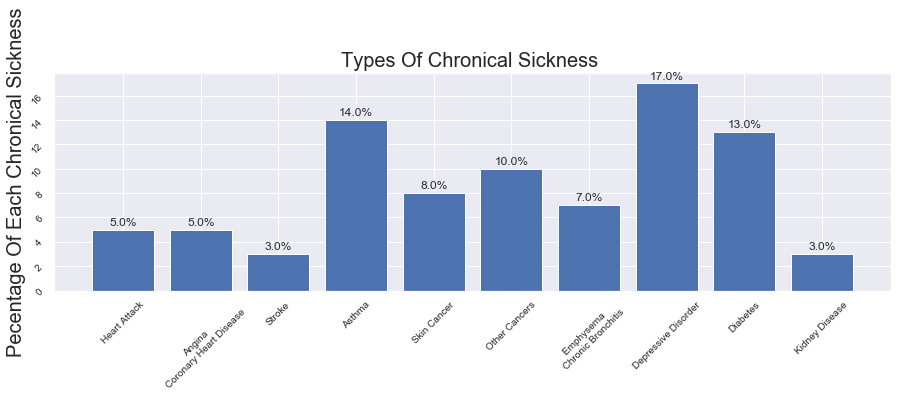

In [32]:
label = sickness_types
x_label=ts['percentage']*100
x = np.arange(len(label))  # the label locations
width =1  # the width of the bars
fig, ax = plt.subplots(figsize=(15,4))
rects1 = ax.bar(x ,round(x_label) , width=0.8)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pecentage of each chronical sickness'.title(),fontsize=20)
ax.set_title('Types of chronical sickness '.title(),fontsize=20)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=10,rotation=45)
ax.set_xticklabels(label)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
plt.show()

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [33]:
# set up dummy for people have chronical sickness.
#if a person have any cronical sickness will be considered as sick person then return 1 else return 0

chro_dummy=pd.DataFrame(pd.DataFrame(d2).transpose().sum(axis=1).apply(lambda x: 1 if x!=0 else 0 ))
chro_dummy.columns=['chro_dum']
chro_dummy['chro_dum'].value_counts()


0    17462
1    17083
Name: chro_dum, dtype: int64

In [34]:
st=pd.DataFrame(df_cleaned['_STATE']).reset_index().drop(columns='index')
st.head()

,_STATE
0,9.0
1,9.0
2,9.0
3,9.0
4,9.0


In [35]:
pd.DataFrame(st.join(chro_dummy,how='outer')).groupby('_STATE')['chro_dum'].value_counts(normalize=True)
#table_pctg


_STATE  chro_dum
9.0     1           0.510956
        0           0.489044
34.0    1           0.506918
        0           0.493082
36.0    0           0.531554
        1           0.468446
Name: chro_dum, dtype: float64

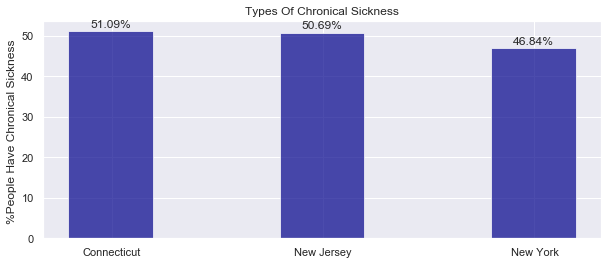

In [36]:
# create graphic to compare chronically sick by state
label2 = ['Connecticut','New Jersey','New York']
percentage=[51.09,50.69,46.84]
x = np.arange(len(label2))  # the label locations
width = 0.1  # the width of the bars
fig, ax = plt.subplots(figsize=(10,4))
rects1 = ax.bar(x - width/20, percentage, width=0.4,color='darkblue',alpha=0.7)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%people have chronical sickness '.title())
ax.set_title('Types of Chronical Sickness'.title())
ax.set_xticks(x)
ax.set_xticklabels(label2)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
plt.show()

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values. check
2. Calculate the descriptive statistics of the variable. check
3. Generate a histogram for the variable. check
4. Generate graphics that show how the responses to this variable might differ by state. check
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [37]:
#select the columns we need  
#select the data from 2017 

data6_1=df_cleaned[['_STATE','IYEAR','SMOKDAY2','PHYSHLTH']].reset_index()
data6=data6_1[data6_1['IYEAR']==2017]
data6.head()

,index,_STATE,IYEAR,SMOKDAY2,PHYSHLTH
0,49938,9.0,2017,NaN,88.0
1,49939,9.0,2017,NaN,88.0
2,49940,9.0,2017,NaN,2.0
3,49941,9.0,2017,NaN,88.0
4,49942,9.0,2017,3.0,88.0


In [38]:
# check how many null inside the data6
data6.isnull().sum()

index           0
_STATE          0
IYEAR           0
SMOKDAY2    20735
PHYSHLTH        0
dtype: int64

In [39]:
#remove all NaN values for data6 
data6_na=data6.dropna(axis=0)
data6_clean=data6_na.drop(columns='index')
#double check if our data already cleaned 
data6_clean.isnull().sum()

_STATE      0
IYEAR       0
SMOKDAY2    0
PHYSHLTH    0
dtype: int64

In [40]:
data6_clean["SMOKDAY2"].value_counts()

3.0    9694
1.0    2669
2.0    1370
9.0      27
7.0       6
Name: SMOKDAY2, dtype: int64

In [41]:
data6_clean.columns

Index(['_STATE', 'IYEAR', 'SMOKDAY2', 'PHYSHLTH'], dtype='object')

In [42]:
data6_clean['SMOKDAY2']=data6_clean['SMOKDAY2'].apply(lambda x: 1 if (x ==1.0 or x == 2.0)  else(0 if x==3 else None))
data6_clean['_STATE']=data6_clean['_STATE'].map({9.0:'CT',34.0:"NJ",36.0:'NY'})
data6_clean['PHYSHLTH']=data6_clean['PHYSHLTH'].apply(lambda x: x if x in range(1,31)  else 0)
data6_clean.isnull().sum()

_STATE       0
IYEAR        0
SMOKDAY2    33
PHYSHLTH     0
dtype: int64

In [43]:
#check updated data
data6_cleaned=data6_clean.dropna(axis=0)
data6_cleaned

,_STATE,IYEAR,SMOKDAY2,PHYSHLTH
4,CT,2017,0.0,0.0
6,CT,2017,0.0,0.0
8,CT,2017,0.0,28.0
13,CT,2017,0.0,0.0
16,CT,2017,0.0,0.0
...,...,...,...,...
34534,NY,2017,0.0,0.0
34535,NY,2017,0.0,10.0
34539,NY,2017,0.0,2.0
34540,NY,2017,1.0,0.0


In [44]:
##assign independent and dependent variables
x_smk=data6_cleaned['SMOKDAY2'] # independent smoke or not 
y_phy=data6_cleaned['PHYSHLTH'] # dependent  Number of Days Physical Health Not Good

In [46]:
# Regression itself
x=sm.add_constant(x_smk)
results=sm.OLS(y_phy,x).fit()
results.summary()

# according to the result y_hat=1.8920*x_smk+4.4871 
# the coeffienct is 1.8920 which means x_smk and y_phy positively increase at siginificant level  0.0000  
# the more you smoke the more days you will be sick 
#if smoke x_smk =1 then y_hat=1.8920+4.4871=6.377
#if not smoke  x_smk =0 y_hat=4.4871 means you bodycondition 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PHYSHLTH   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     115.1
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           9.79e-27
Time:                        14:33:30   Log-Likelihood:                -50286.
No. Observations:               13733   AIC:                         1.006e+05
Df Residuals:                   13731   BIC:                         1.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4868      0.096     46.897      0.000       4.299       4.674
SMOKDAY2       1.8923      0.176     10.726      0.000       1.546       2.238
==============================================================================
Omnibus:                     4442.507   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10592.092
Skew:                           1.878   Prob(JB):                         0.00
Kurtosis:                       5.097   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
s_smk=pd.DataFrame(data6_clean.groupby('_STATE')['SMOKDAY2'].mean()).reset_index()
s_phy=pd.DataFrame(data6_clean.groupby('_STATE')['PHYSHLTH'].mean()).reset_index()
combo1=pd.merge(s_smk,s_phy,how="outer",on='_STATE')
combo1

,_STATE,SMOKDAY2,PHYSHLTH
0,CT,0.247833,4.630348
1,NJ,0.297742,5.390681
2,NY,0.332275,5.065107


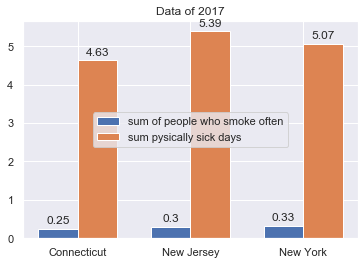

In [48]:
#4.Generate graphics that show how the responses to this variable might differ by state. check
label6 = ['Connecticut','New Jersey','New York']
x = np.arange(len(label6))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width/2, round(combo1['SMOKDAY2'],2), width, label='sum of people who smoke often')
rects2 = ax.bar(x + width/2, round(combo1['PHYSHLTH'],2), width, label='sum pysically sick days ')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('')
ax.set_title('Data of 2017')
ax.set_xticks(x)
ax.set_xticklabels(label6)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.legend(loc='center')
plt.show()

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [64]:
#1. Clean up the values.
data7_1=df_cleaned[['_STATE','IYEAR','IDAY','IMONTH','ALCDAY5','PHYSHLTH']].reset_index().drop(columns='index')
data7=data7_1[data7_1['IYEAR']==2017]
data7.head()


,_STATE,IYEAR,IDAY,IMONTH,ALCDAY5,PHYSHLTH
0,9.0,2017,17,5,101.0,88.0
1,9.0,2017,14,2,230.0,88.0
2,9.0,2017,29,1,888.0,2.0
3,9.0,2017,11,9,103.0,88.0
4,9.0,2017,18,7,101.0,88.0


In [65]:
#check if there are some missing data 
data7.isnull().sum()

_STATE         0
IYEAR          0
IDAY           0
IMONTH         0
ALCDAY5     1901
PHYSHLTH       0
dtype: int64

In [66]:
#clean the missing data 
#remove all NaN values for data6 
data7_clean=data7.dropna(axis=0)

#double check if our data already cleaned 
data7_clean.isnull().sum()

_STATE      0
IYEAR       0
IDAY        0
IMONTH      0
ALCDAY5     0
PHYSHLTH    0
dtype: int64

In [67]:
data7_clean['ALCDAY5'].value_counts()

888.0    13031
201.0     3022
202.0     2316
101.0     1594
203.0     1349
102.0     1232
230.0     1164
205.0     1156
204.0     1144
210.0      840
103.0      782
107.0      710
220.0      648
215.0      588
206.0      387
104.0      386
208.0      369
105.0      350
207.0      277
225.0      265
777.0      225
999.0      200
212.0      144
106.0      109
228.0       56
214.0       53
229.0       31
209.0       28
227.0       24
218.0       19
216.0       15
226.0       15
224.0       14
222.0       13
221.0       13
213.0       11
211.0       10
217.0        7
223.0        2
219.0        1
Name: ALCDAY5, dtype: int64

In [111]:
# see updated data
data7_clean1=data7_clean[data7_clean['ALCDAY5']!=777.0]
#    
data7_clean2=data7_clean1[data7_clean1['ALCDAY5']!=999.0]


#  if the person drinks often per week , then the value* 4 to calculate how many drink times in one month 
#if some people don't drink = 0  and people 
data7_clean2['ALCDAY5']=data7_clean2['ALCDAY5'].apply(lambda x : (x-100)*4 if (x>=101.0 and x<=107.0) else( x-200 if(x>=201.0 and x<=230) else 0))

data7_clean3=data7_clean2.copy()

/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(0, 0.5, 'Amount of People')

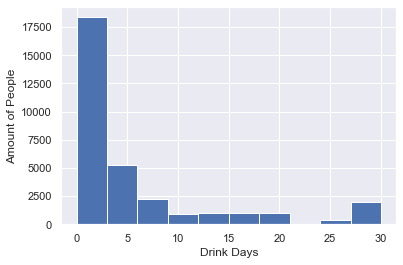

In [112]:
#Generate a histogram for the variable.
#Each group peole 
plt.hist(data7_clean3['ALCDAY5'])
plt.xlabel('Drink Days')
plt.ylabel('Amount of People')


In [113]:
data7_clean3

,_STATE,IYEAR,IDAY,IMONTH,ALCDAY5,PHYSHLTH
0,9.0,2017,17,5,4.0,88.0
1,9.0,2017,14,2,30.0,88.0
2,9.0,2017,29,1,0.0,2.0
3,9.0,2017,11,9,12.0,88.0
4,9.0,2017,18,7,4.0,88.0
...,...,...,...,...,...,...
34539,36.0,2017,21,4,8.0,2.0
34540,36.0,2017,15,5,3.0,88.0
34541,36.0,2017,25,6,0.0,88.0
34542,36.0,2017,21,7,4.0,6.0


In [114]:
# map the state
data7_clean3['_STATE']=data7_clean3['_STATE'].map({9.0:'CT',34.0:"NJ",36.0:'NY'})
data7_clean3.head()

,_STATE,IYEAR,IDAY,IMONTH,ALCDAY5,PHYSHLTH
0,CT,2017,17,5,4.0,88.0
1,CT,2017,14,2,30.0,88.0
2,CT,2017,29,1,0.0,2.0
3,CT,2017,11,9,12.0,88.0
4,CT,2017,18,7,4.0,88.0


In [132]:
#set up the value we need to use 
data7_clean3['PHYSHLTH']=data7_clean3['PHYSHLTH'].apply(lambda x: x if x in range(1,31) else 0)
data7_clean3.head()

,_STATE,IYEAR,IDAY,IMONTH,ALCDAY5,PHYSHLTH
0,CT,2017,17,5,4.0,0.0
1,CT,2017,14,2,30.0,0.0
2,CT,2017,29,1,0.0,2.0
3,CT,2017,11,9,12.0,0.0
4,CT,2017,18,7,4.0,0.0


In [118]:
#Generate graphics that show how the responses to this variable might differ by state.
state_alco=pd.DataFrame(data7_clean3.groupby('_STATE')['ALCDAY5'].mean()).reset_index()
state_alco

,_STATE,ALCDAY5
0,CT,6.011149
1,NJ,4.887219
2,NY,5.072729


Text(0, 0.5, 'Mean of each states')

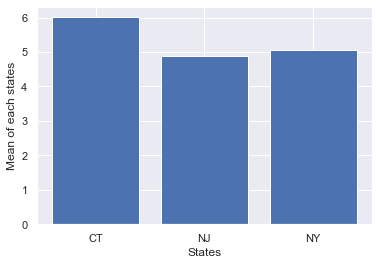

In [124]:
plt.bar(state_alco['_STATE'],state_alco['ALCDAY5'])
plt.xlabel('States')
plt.ylabel('Mean of each states')
#CT : each person drink (6) six days each month 
#NJ: each person drink (5) five days each month
#NY: each person drink (5) five days each month

In [146]:
# To see the number for each state 

#create an empty dataframe
data_dum=pd.DataFrame()
#add a column named 'ALCDAY5' and get dummy varibel for it to see how many people drink if drink 1 , dont drink 0 
data_dum['ALCDAY5']=data7_clean3['ALCDAY5'].apply(lambda x: 0 if x==0.0 else 1)

# add another column named state
data_dum['STATE']=data7_clean3['_STATE']
# check the percentage of the people drink  and the people don't drink 
data_dum.groupby('STATE')['ALCDAY5'].value_counts(normalize=True)

STATE  ALCDAY5
CT     1          0.636124
       0          0.363876
NJ     1          0.574493
       0          0.425507
NY     1          0.579078
       0          0.420922
Name: ALCDAY5, dtype: float64

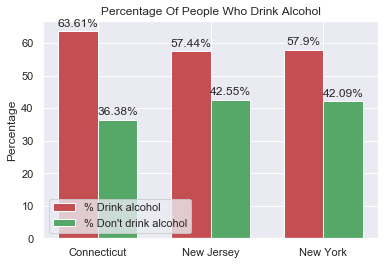

In [147]:
# from the result above 
states_list = ['Connecticut','New Jersey','New York']
alcoh_1=[63.61,57.44,57.9]
alcoh_0=[36.38,42.55,42.09]
x = np.arange(len(states_list))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - width/2, alcoh_1, width, color='r', label='% Drink alcohol')
rects2 = ax.bar(x + width/2, alcoh_0, width,color='g' ,label='% Don\'t drink alcohol')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of people who drink alcohol'.title())
ax.set_xticks(x)
ax.set_xticklabels(states_list)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.legend(loc='lower left')
plt.show()



In [148]:
#regression itself 
# set up independent and dependent variables
x1=data7_clean3['ALCDAY5']
y=data7_clean3['PHYSHLTH']

In [149]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression.
results.summary()

### we can see the coeff is 0.005  at the significant level 0.000  
### the mor alcohol you drink the more days you are sick 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PHYSHLTH   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           4.72e-55
Time:                        17:03:22   Log-Likelihood:            -1.1423e+05
No. Observations:               32175   AIC:                         2.285e+05
Df Residuals:                   32173   BIC:                         2.285e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4984      0.056     80.371      0.000       4.389       4.608
ALCDAY5       -0.0899      0.006    -15.658      0.000      -0.101      -0.079
==============================================================================
Omnibus:                    13992.439   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49798.068
Skew:                           2.295   Prob(JB):                         0.00
Kurtosis:                       7.010   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [60]:
# Investigate the relationship between income level and health 
##Income Level   ['INCOME2'] 
##1:$10,000 / 
#2:$15,000 /
#3:  $20,000 /
#4:$25,000/
#5: $35,000 /
#6:$50,000/
#7:$75,000/
#8:75,001/
#77:dont know/
#99:refused

In [61]:
# select the variable we need 

data8_raw1=df_cleaned[['_STATE','IYEAR','PHYSHLTH','INCOME2','MEDCOST','EDUCA','_AGE_G']]
data8_raw1.head()

,_STATE,IYEAR,PHYSHLTH,INCOME2,MEDCOST,EDUCA,_AGE_G
49938,9.0,2017,88.0,7.0,2.0,6.0,2.0
49939,9.0,2017,88.0,8.0,2.0,5.0,4.0
49940,9.0,2017,2.0,77.0,2.0,6.0,1.0
49941,9.0,2017,88.0,8.0,2.0,6.0,5.0
49942,9.0,2017,88.0,8.0,2.0,5.0,5.0


In [62]:
data8_raw=data8_raw1[data8_raw1['IYEAR']==2017]
data8_raw.head()

,_STATE,IYEAR,PHYSHLTH,INCOME2,MEDCOST,EDUCA,_AGE_G
49938,9.0,2017,88.0,7.0,2.0,6.0,2.0
49939,9.0,2017,88.0,8.0,2.0,5.0,4.0
49940,9.0,2017,2.0,77.0,2.0,6.0,1.0
49941,9.0,2017,88.0,8.0,2.0,6.0,5.0
49942,9.0,2017,88.0,8.0,2.0,5.0,5.0


In [63]:
data8_raw.shape

(34501, 7)

In [64]:
data8_raw.isnull().sum()

_STATE        0
IYEAR         0
PHYSHLTH      0
INCOME2     315
MEDCOST       0
EDUCA         0
_AGE_G        0
dtype: int64

In [65]:
data8=data8_raw.dropna(axis=0)
data8.head()

,_STATE,IYEAR,PHYSHLTH,INCOME2,MEDCOST,EDUCA,_AGE_G
49938,9.0,2017,88.0,7.0,2.0,6.0,2.0
49939,9.0,2017,88.0,8.0,2.0,5.0,4.0
49940,9.0,2017,2.0,77.0,2.0,6.0,1.0
49941,9.0,2017,88.0,8.0,2.0,6.0,5.0
49942,9.0,2017,88.0,8.0,2.0,5.0,5.0


In [66]:
data8.isnull().sum()

_STATE      0
IYEAR       0
PHYSHLTH    0
INCOME2     0
MEDCOST     0
EDUCA       0
_AGE_G      0
dtype: int64

In [67]:
data8.describe()

,_STATE,IYEAR,PHYSHLTH,INCOME2,MEDCOST,EDUCA,_AGE_G
count,34186.000000,34186.0,34186.000000,34186.000000,34186.000000,34186.000000,34186.000000
mean,27.026180,2017.0,60.200228,19.959808,1.919909,5.061224,4.448722
std,12.030145,0.0,37.502833,31.528356,0.433857,1.101023,1.531385
min,9.000000,2017.0,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.000000,2017.0,15.000000,5.000000,2.000000,4.000000,3.000000
50%,34.000000,2017.0,88.000000,8.000000,2.000000,5.000000,5.000000
75%,36.000000,2017.0,88.000000,8.000000,2.000000,6.000000,6.000000
max,36.000000,2017.0,99.000000,99.000000,9.000000,9.000000,6.000000


In [69]:
##['INCOME2']  clean {77: don't know} and {99 :refuse}
#data8['INCOME2'].apply(lambda x: 0 if (x==77.0 or x==99.0) else x).value_counts()


data8_clean1=data8[data8['INCOME2']!= 77.0]
data8_clean2=data8_clean1[data8_clean1['INCOME2']!=99]
data8_clean=data8_clean2[data8_clean2['EDUCA']!=9]
data8_clean.head()

,_STATE,IYEAR,PHYSHLTH,INCOME2,MEDCOST,EDUCA,_AGE_G
49938,9.0,2017,88.0,7.0,2.0,6.0,2.0
49939,9.0,2017,88.0,8.0,2.0,5.0,4.0
49941,9.0,2017,88.0,8.0,2.0,6.0,5.0
49942,9.0,2017,88.0,8.0,2.0,5.0,5.0
49943,9.0,2017,88.0,8.0,2.0,6.0,5.0


In [70]:
data8_clean.shape

(28470, 7)

In [103]:
data8_clean['PHYSHLTH']=data8_clean['PHYSHLTH'].apply(lambda x: x if x in range(1,31) else 0)

/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
x_edu=data8_clean['EDUCA']
y=data8_clean['PHYSHLTH']

In [73]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x_EDU = sm.add_constant(x_edu)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results1 = sm.OLS(y,x_EDU).fit()
# Print a nice summary of the regression.
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PHYSHLTH   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     534.0
Date:                Tue, 21 Jan 2020   Prob (F-statistic):          4.53e-117
Time:                        10:14:27   Log-Likelihood:            -1.0074e+05
No. Observations:               28470   AIC:                         2.015e+05
Df Residuals:                   28468   BIC:                         2.015e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5555      0.246     38.888      0.000       9.074      10.037
EDUCA         -1.0958      0.047    -23.109      0.000      -1.189      -1.003
==============================================================================
Omnibus:                    12295.623   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43817.740
Skew:                           2.273   Prob(JB):                         0.00
Kurtosis:                       7.034   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The result : The higher education you have the lower probability of sickness you get 
## why?How are health and education related?
##For example, in 2011 the prevalence of diabetes in the United States was 15 percent for adults who did not complete high school. That was twice as high as the rate among college graduates. In the same year, more than one-fourth of adults without a high school diploma were smokers, compared to 8 percent of college graduates. Adults who don't finish high school also can expect to live nine years less than their college-educated peers. And that already sizable gap is widening. 

from https://www.aafp.org/news/blogs/leadervoices/entry/learning_matters_how_education_affects.html

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. Education level  ---Assumption  The higher education level you are at the less days you are sick 

2. Fruits & Vegetables  ---Assumption  The more Fruits & Vegetables you eat the less days you are sick 

3. Exercise  ---Assumption  The more exercise you do the less days you are sick 


## Bonus: Create some cool graphics.  

In [77]:
data8_clean.head()

,_STATE,IYEAR,PHYSHLTH,INCOME2,MEDCOST,EDUCA,_AGE_G
49938,9.0,2017,0.0,7.0,2.0,6.0,2.0
49939,9.0,2017,0.0,8.0,2.0,5.0,4.0
49941,9.0,2017,0.0,8.0,2.0,6.0,5.0
49942,9.0,2017,0.0,8.0,2.0,5.0,5.0
49943,9.0,2017,0.0,8.0,2.0,6.0,5.0


In [78]:
data8_clean['INCOME2'].value_counts(normalize=True)
data8_bar=pd.DataFrame(data8_clean.groupby('INCOME2')['PHYSHLTH'].mean()).reset_index()
data8_bar.columns=['Income','Physical Sickness Days']


Text(0.5, 1.0, 'Income  VS Physical Sickness Days')

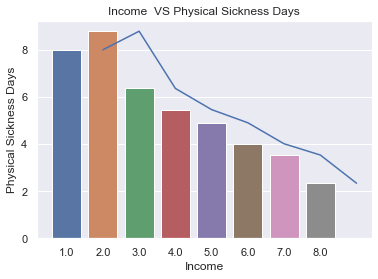

In [79]:
# Investigate the relationship between income level and health 
##Income Level   ['INCOME2'] 
##1:$10,000 / 
#2:$15,000 /
#3:  $20,000 /
#4:$25,000/
#5: $35,000 /
#6:$50,000/
#7:$75,000/
#8:75,001/
#77:dont know/
#99:refused

sns.barplot('Income','Physical Sickness Days',data=data8_bar)
sns.lineplot('Income','Physical Sickness Days',data=data8_bar)
plt.title('Income  VS Physical Sickness Days')



#from the this bar chart : The higher income you have the lower days you are sick. 


In [80]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x_income = sm.add_constant(data8_bar['Income'])
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results1 = sm.OLS(data8_bar['Physical Sickness Days'],x_income).fit()
# Print a nice summary of the regression.
results1.summary()

/Users/yingyuxuan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Physical Sickness Days   R-squared:                       0.941
Model:                                OLS   Adj. R-squared:                  0.931
Method:                     Least Squares   F-statistic:                     95.17
Date:                    Tue, 21 Jan 2020   Prob (F-statistic):           6.67e-05
Time:                            10:15:24   Log-Likelihood:                -5.8616
No. Observations:                       8   AIC:                             15.72
Df Residuals:                           6   BIC:                             15.88
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3625      0.453     20.668      0.000       8.254      10.471
Income        -0.8751      0.090     -9.755      0.000      -1.095      -0.656
==============================================================================
Omnibus:                        8.711   Durbin-Watson:                   2.730
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                2.848
Skew:                           1.386   Prob(JB):                        0.241
Kurtosis:                       3.928   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

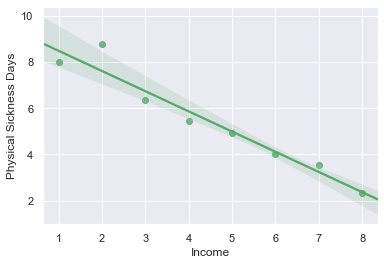

In [81]:
sns.regplot('Income','Physical Sickness Days',data=data8_bar,color="g")

In [111]:
# why does income affect health ?
#1) low income may not have good sanitation.
#2) people cannot afford the insurance and cannot get cured fast, so they sick longer.
#3) even though low income people they have benifits from goverment, however other taxpayers incomes are matters
### if taxpayers incomes are low and they pay just a little bit and the goverment could not have enough money 
### to support the poverty better. 